<a href="https://colab.research.google.com/github/4GeeksAcademy/modulo_9_web-scraping-project-tutorial/blob/main/proyecto_webscrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
import requests
import time

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url, time.sleep(10)).text

# If no information is extracted, then connect as anonymous
if "403 Forbidden" in html_data:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(url, headers = headers)
    time.sleep(10)
    html_data = request.text

html_data

'<html>\r\n<head>\r\n\n</head>\r\n<body>\r\n<div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">\r\n\r\n<h1>We do not allow automated access to our servers.</h1>\r\n<h2><p>Automated access to our data is prohibited by our data provider.</p>  \r\n<p>If you are a user attempting to access the site via a browser, please follow this process to regain access:</p>\r\n\r\n<ul>\r\n  <li>Go to <a href=\'https://whatismyipaddress.com/\' target=\'_blank\' rel=\'noopener noreferrer\'>whatismyipaddress</a> and obtain your IPv4 address</li>\r\n  <li>Email us your IPv4 address at <a href="/cdn-cgi/l/email-protection" class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c">[email&#160;protected]</a></li>\r\n  <li>We will add you to our whitelist within 24 hours</li>\r\n</ul>\r\n</h2>\r\n</div>\r\n<script data-cfasync="false">!function(){"use strict";function e(e){try{if("undefined"==typeof console)return;"er

In [ ]:
import requests

# Seleccionar el recurso a descargar
resource_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Petición para descargar el fichero de Internet
response = requests.get(resource_url)

# Si la petición se ha ejecutado correctamente (código 200), entonces el fichero se ha podido descargar
if response:
    # Se almacena el archivo en el directorio actual para usarlo más tarde
    with open("tesla.csv", "wb") as dataset:
        dataset.write(response.content)

TRANSFORMAR HTML

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data,"html.parser")
soup

<html>
<head>
</head>
<body>
<div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">
<h1>We do not allow automated access to our servers.</h1>
<h2><p>Automated access to our data is prohibited by our data provider.</p>
<p>If you are a user attempting to access the site via a browser, please follow this process to regain access:</p>
<ul>
<li>Go to <a href="https://whatismyipaddress.com/" rel="noopener noreferrer" target="_blank">whatismyipaddress</a> and obtain your IPv4 address</li>
<li>Email us your IPv4 address at <a class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c" href="/cdn-cgi/l/email-protection">[email protected]</a></li>
<li>We will add you to our whitelist within 24 hours</li>
</ul>
</h2>
</div>
<script data-cfasync="false">!function(){"use strict";function e(e){try{if("undefined"==typeof console)return;"error"in console?console.error(e):console.log(e)}catch(e){}}function t(e,t){v

In [ ]:
import requests
import time

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
response = requests.get(url, headers=headers)
time.sleep(10)

html_data = response.text

# Verificar si el HTML contiene datos útiles
if "We do not allow automated access" in html_data:
    print("Acceso automatizado bloqueado.")
else:
    # Continuar con el análisis y la extracción de datos usando BeautifulSoup
    soup = BeautifulSoup(html_data, "html.parser")
    tables = soup.find_all("table")
    # ...


In [ ]:
# Find all tables
tables = soup.find_all("table")
tables

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2023</td>
 <td style="text-align:center">$96,773</td>
 </tr>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <

In [ ]:
import pandas as pd

for index, table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
        break

# Create a DataFrame
tesla_revenue = pd.DataFrame(columns = ["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({
            "Date": Date,
            "Revenue": Revenue
        }, index = [0])], ignore_index = True)

tesla_revenue.head()

,Date,Revenue
0,2024-03-31,21301
1,2023-12-31,25167
2,2023-09-30,23350
3,2023-06-30,24927
4,2023-03-31,23329


PROCESAMIENTO DATOS EN DATAFRAME

In [ ]:
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.head()

,Date,Revenue
0,2024-03-31,21301
1,2023-12-31,25167
2,2023-09-30,23350
3,2023-06-30,24927
4,2023-03-31,23329


ALMACENAR DATOS EN SQLITE

In [ ]:
import sqlite3

connection = sqlite3.connect("Tesla.db")
connection

In [ ]:
cursor = connection.cursor()
cursor.execute("""CREATE TABLE revenue (Date, Revenue)""")

In [ ]:
tesla_tuples = list(tesla_revenue.to_records(index = False))
tesla_tuples[:5]

[('2024-03-31', '21301'),
 ('2023-12-31', '25167'),
 ('2023-09-30', '23350'),
 ('2023-06-30', '24927'),
 ('2023-03-31', '23329')]

In [ ]:
cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
connection.commit()

In [ ]:
for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

('2024-03-31', '21301')
('2023-12-31', '25167')
('2023-09-30', '23350')
('2023-06-30', '24927')
('2023-03-31', '23329')
('2022-12-31', '24318')
('2022-09-30', '21454')
('2022-06-30', '16934')
('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')
('2014-03-31', '621')
('2013-12-31', '615')
('2013-09-30', '431')
('2013

EVOLUCION INGRESOS

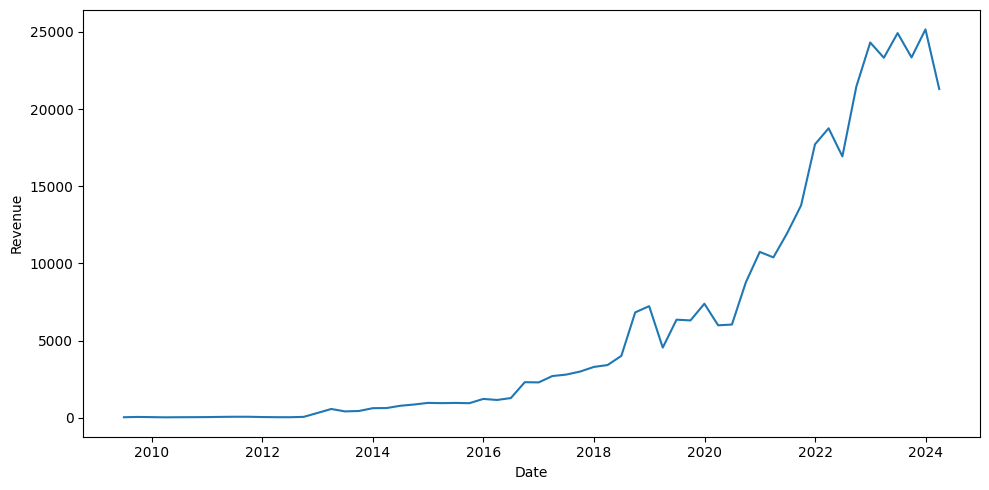

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype('int')
sns.lineplot(data = tesla_revenue, x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()

BENEFICIO BRUTO ANUAL

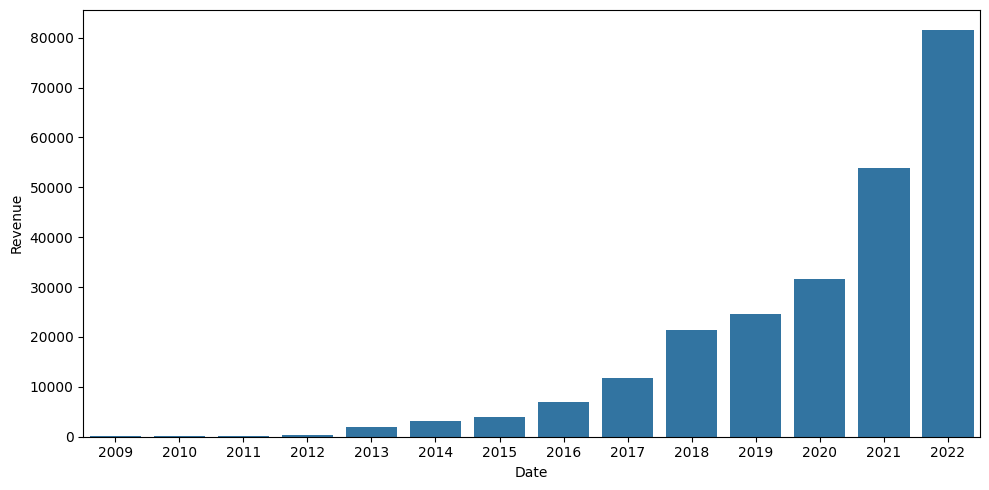

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue_yearly = tesla_revenue.groupby(tesla_revenue["Date"].dt.year).sum().reset_index()

sns.barplot(data = tesla_revenue_yearly[tesla_revenue_yearly["Date"] < 2023], x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()

BENEFICIO BRUTO MENSUAL

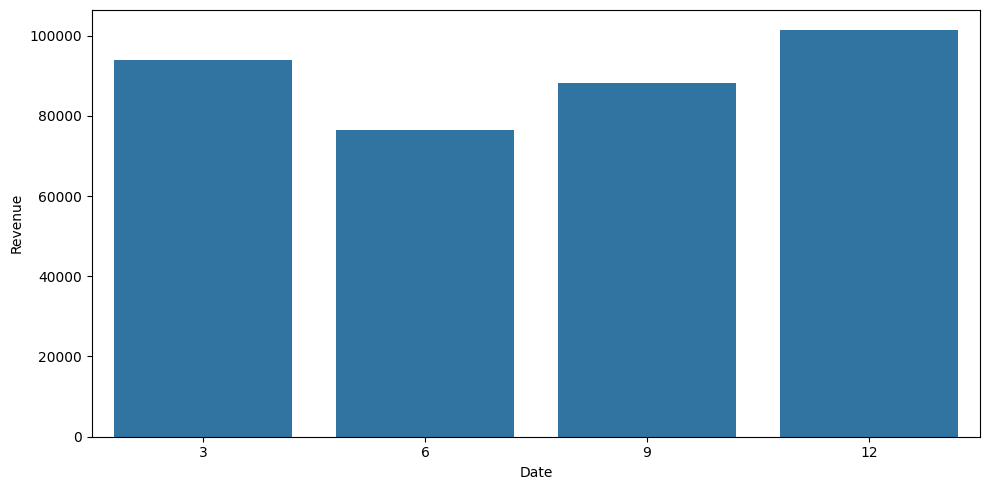

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue_monthly = tesla_revenue.groupby(tesla_revenue["Date"].dt.month).sum().reset_index()

sns.barplot(data = tesla_revenue_monthly, x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()